In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv("avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.shape

(18249, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

<Axes: >

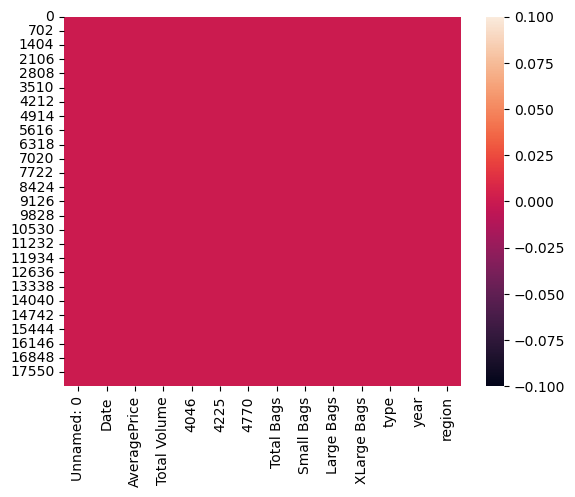

In [9]:
sns.heatmap(df.isnull())

In [10]:
df["Date"]=pd.to_datetime(df.Date,format='%Y-%m-%d')

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [12]:
df.set_index("Date",inplace=True)

In [13]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
df.nunique().to_frame("No. of unique values") 

,No. of unique values
Unnamed: 0,53
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


In [15]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4

In [16]:
print("Total duplicates Rows are =",df.duplicated().sum())

Total duplicates Rows are = 0


In [17]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


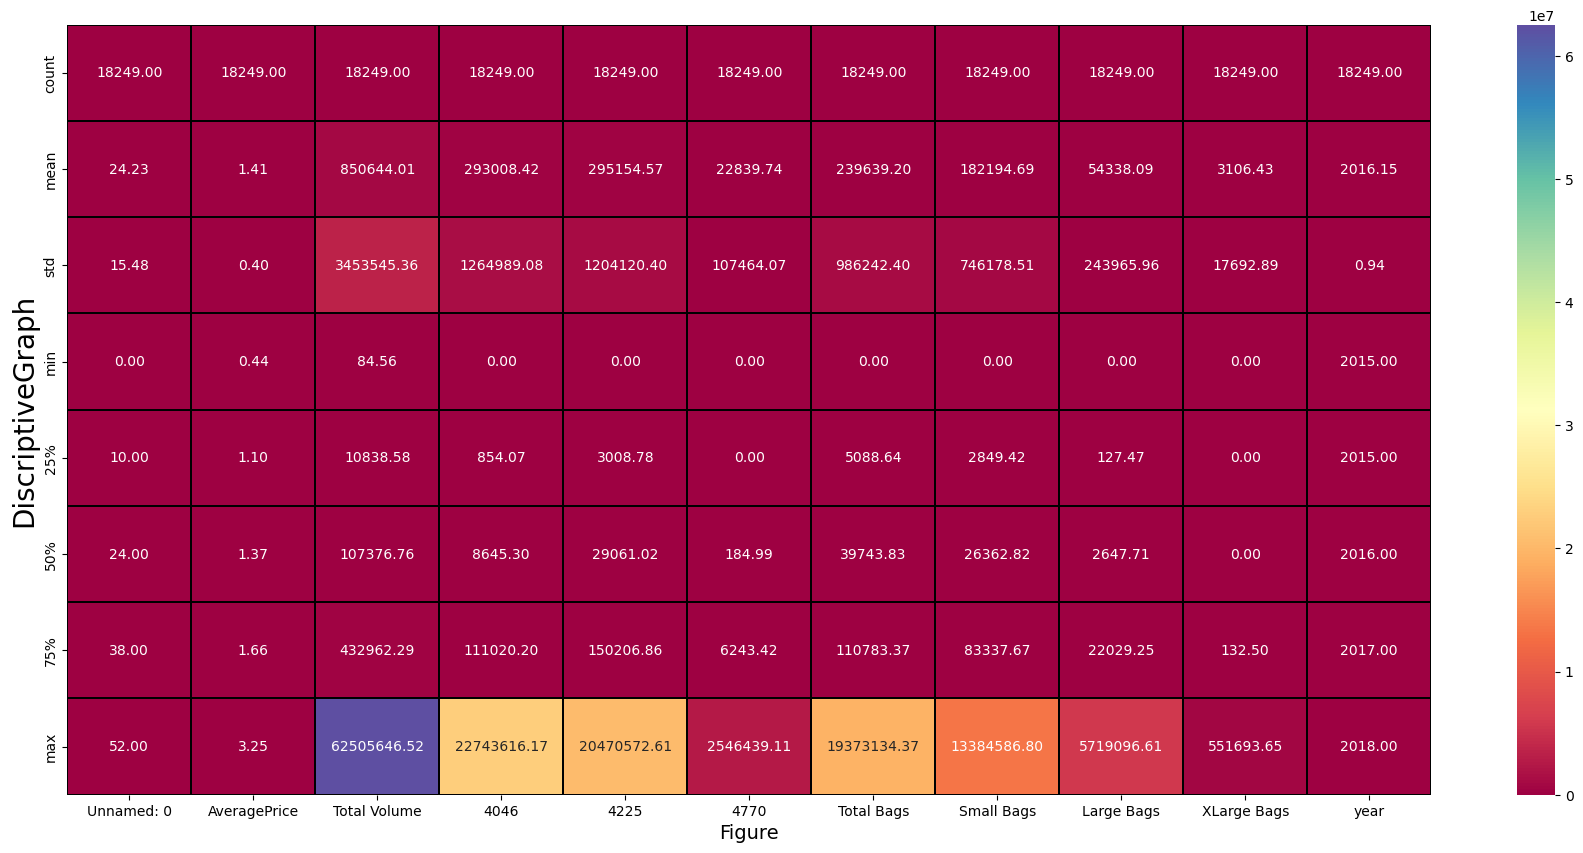

In [18]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f",linewidth=0.2,linecolor="black",cmap="Spectral")
plt.xlabel("Figure",fontsize=14)
plt.ylabel("DiscriptiveGraph",fontsize=20)
plt.show()

In [19]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

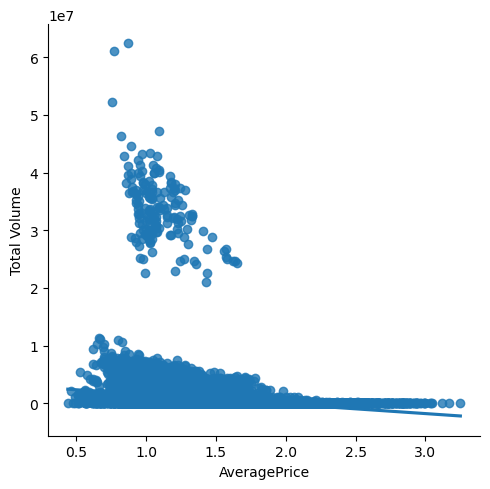

In [20]:
sns.lmplot(x="AveragePrice",y="Total Volume",data=df,palette="colorblind")

In [21]:
df1=df[["Unnamed: 0","AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]

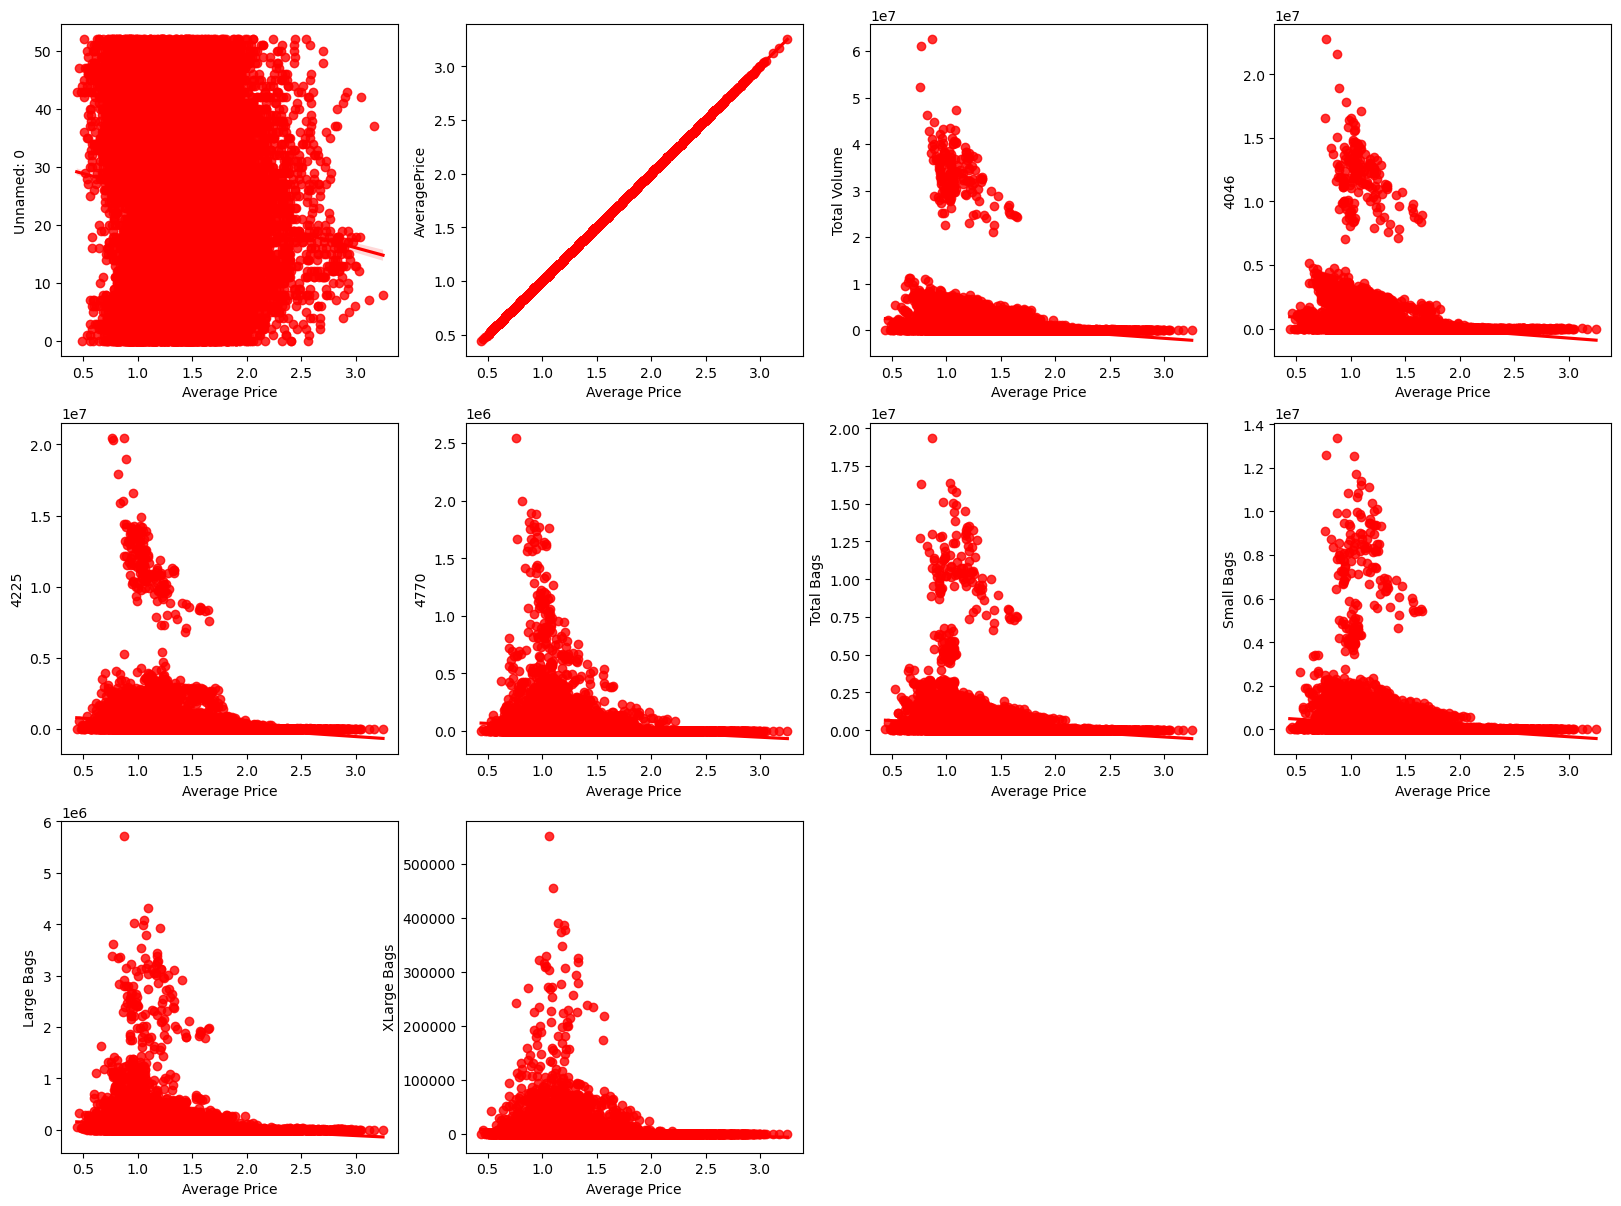

In [22]:
plt.figure(figsize=(20,25))
p=1
for i in df[["Unnamed: 0","AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]:
    
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x="AveragePrice",y=i,data=df1,color="r")
        plt.xlabel("Average Price")
        plt.ylabel(i)
        p+=1
        
plt.show()

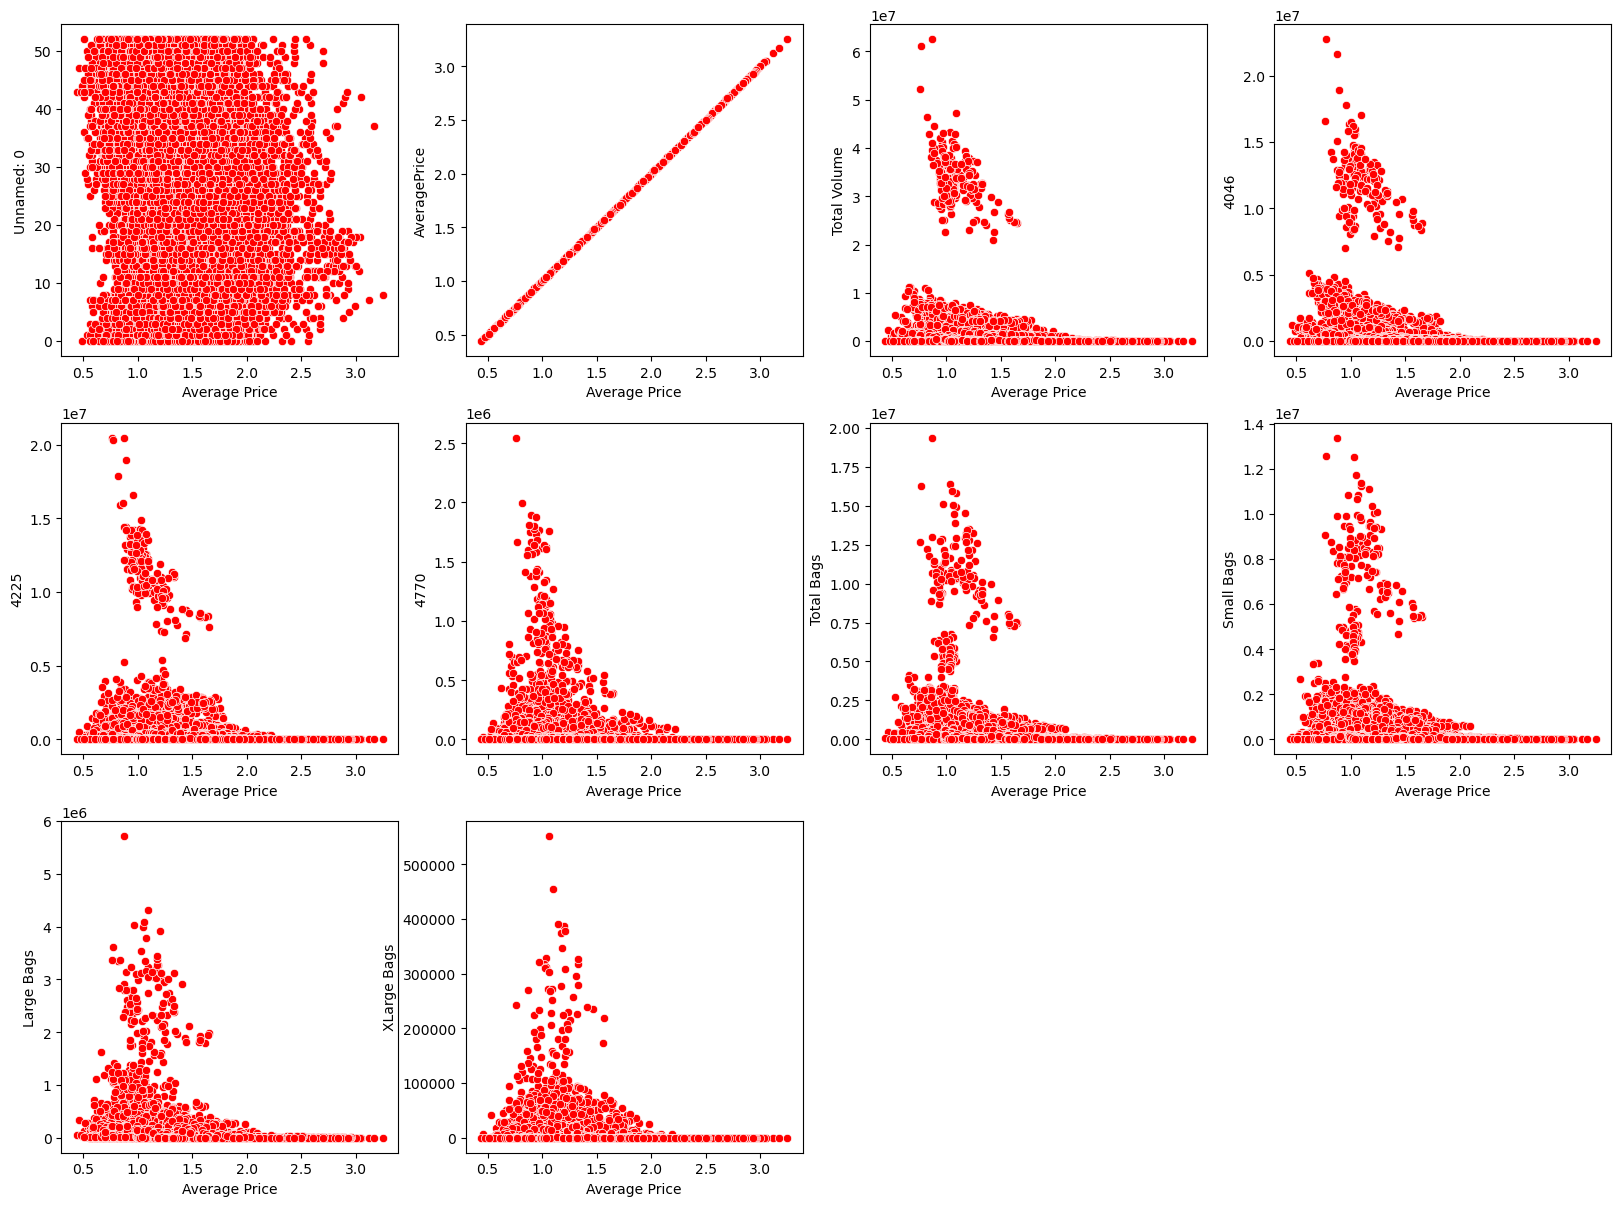

In [23]:
plt.figure(figsize=(20,25))
p=1
for i in df[["Unnamed: 0","AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]:
    
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x="AveragePrice",y=i,data=df1,color="r")
        plt.xlabel("Average Price")
        plt.ylabel(i)
        p+=1
        
plt.show()

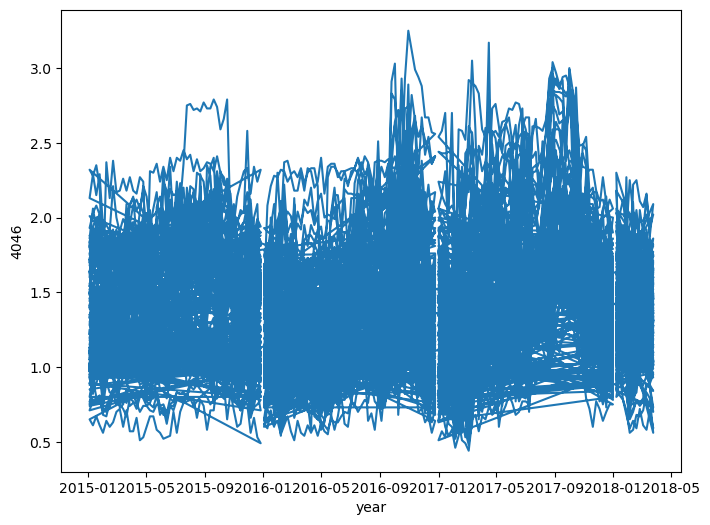

In [24]:
plt.figure(figsize=(8,6))
plt.plot(df1.AveragePrice,label="Average Price")
plt.ylabel("4046")
plt.xlabel("year")
plt.show()

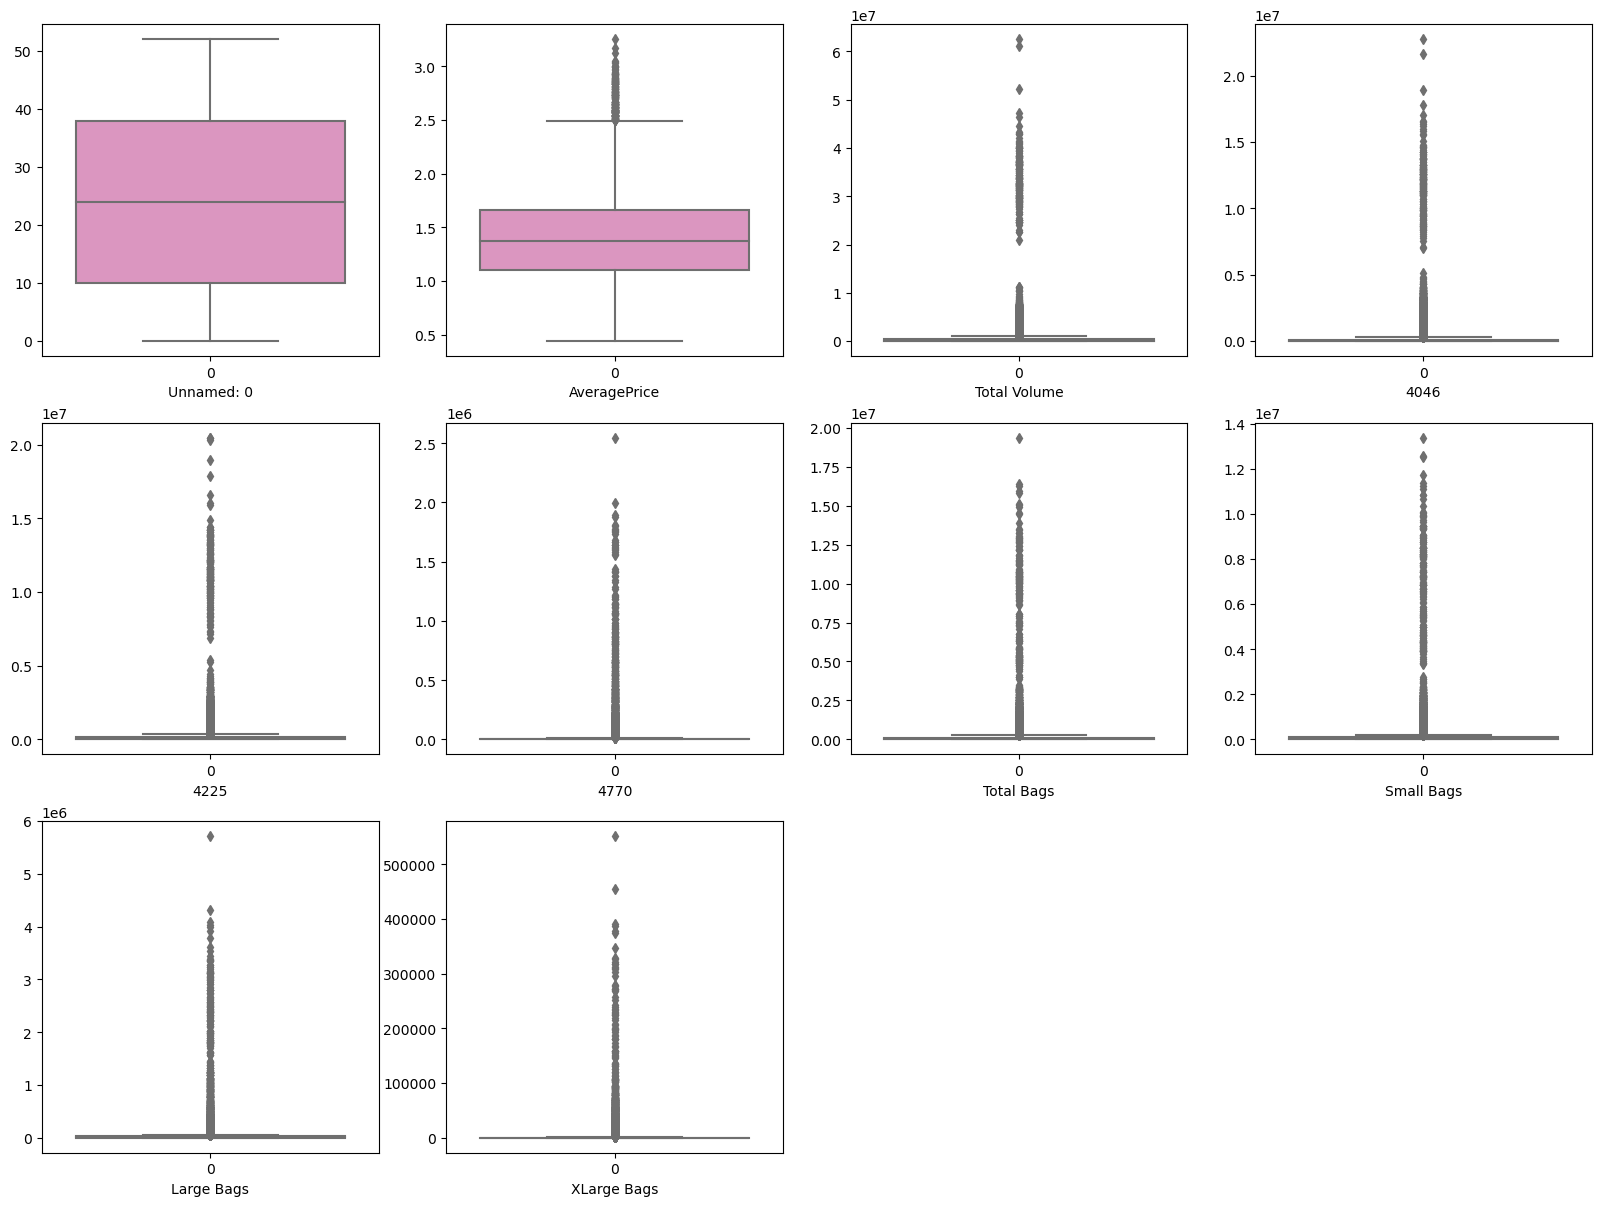

In [25]:
plt.figure(figsize=(20,25))
p=1
for i in df[["Unnamed: 0","AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
        p+=1
plt.show()

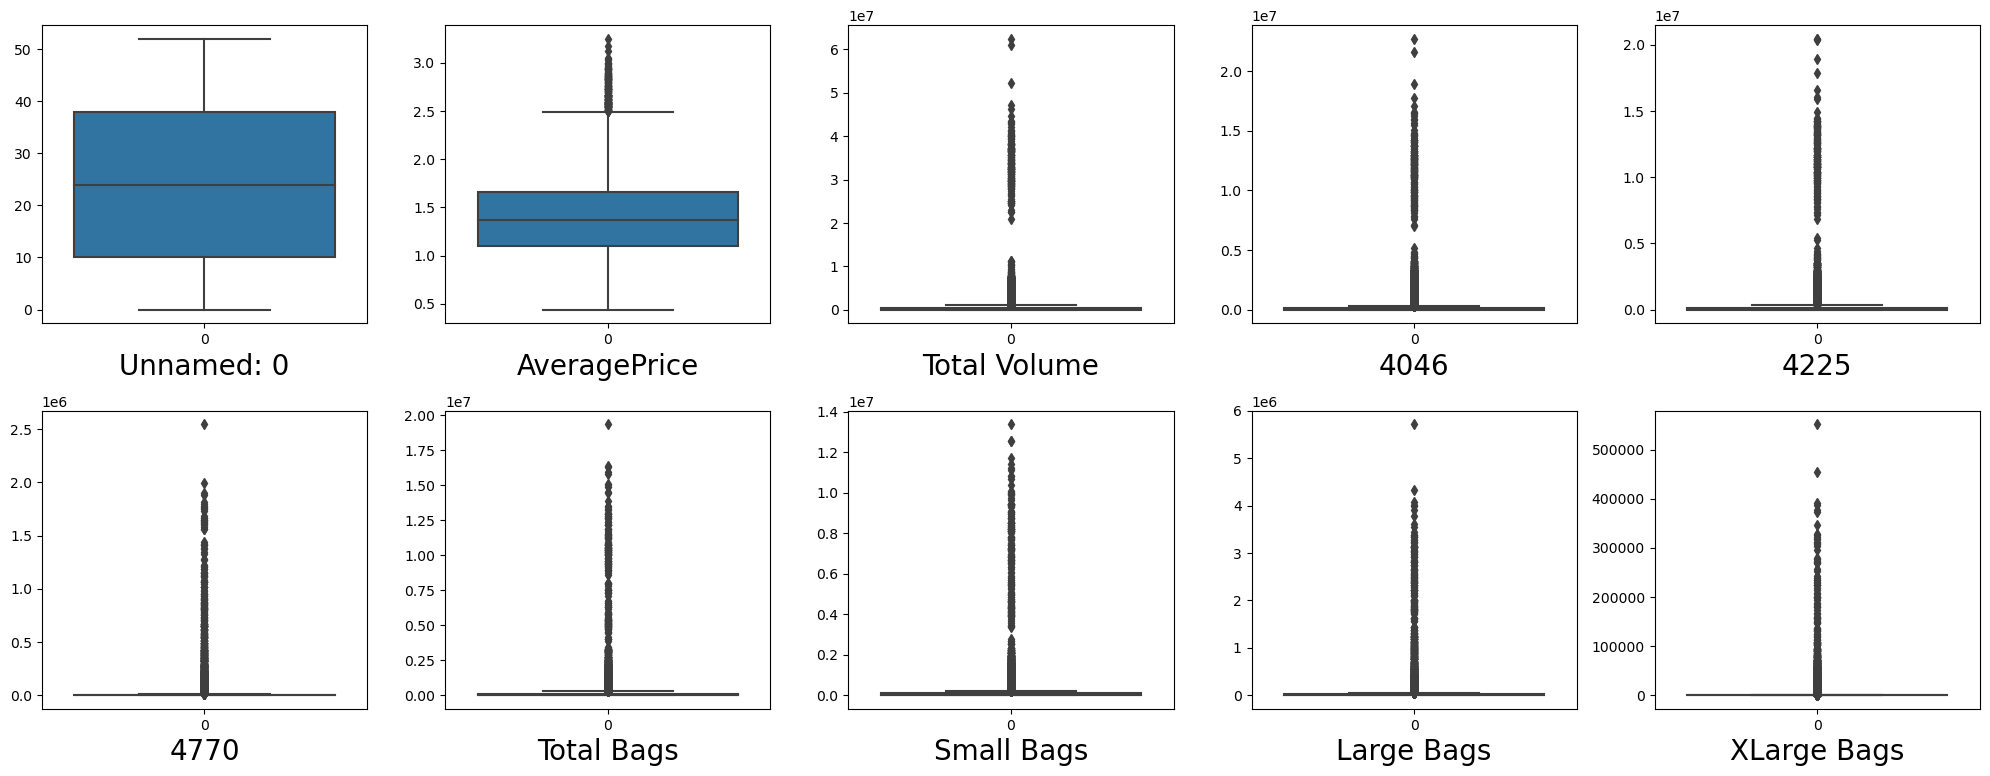

In [26]:
plt.figure(figsize=(20,15),facecolor="white")
plot_number=1

for column in df[["Unnamed: 0","AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]:
    if plot_number<=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=20)
        plot_number+=1
        
        
    
        
plt.tight_layout()

In [27]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

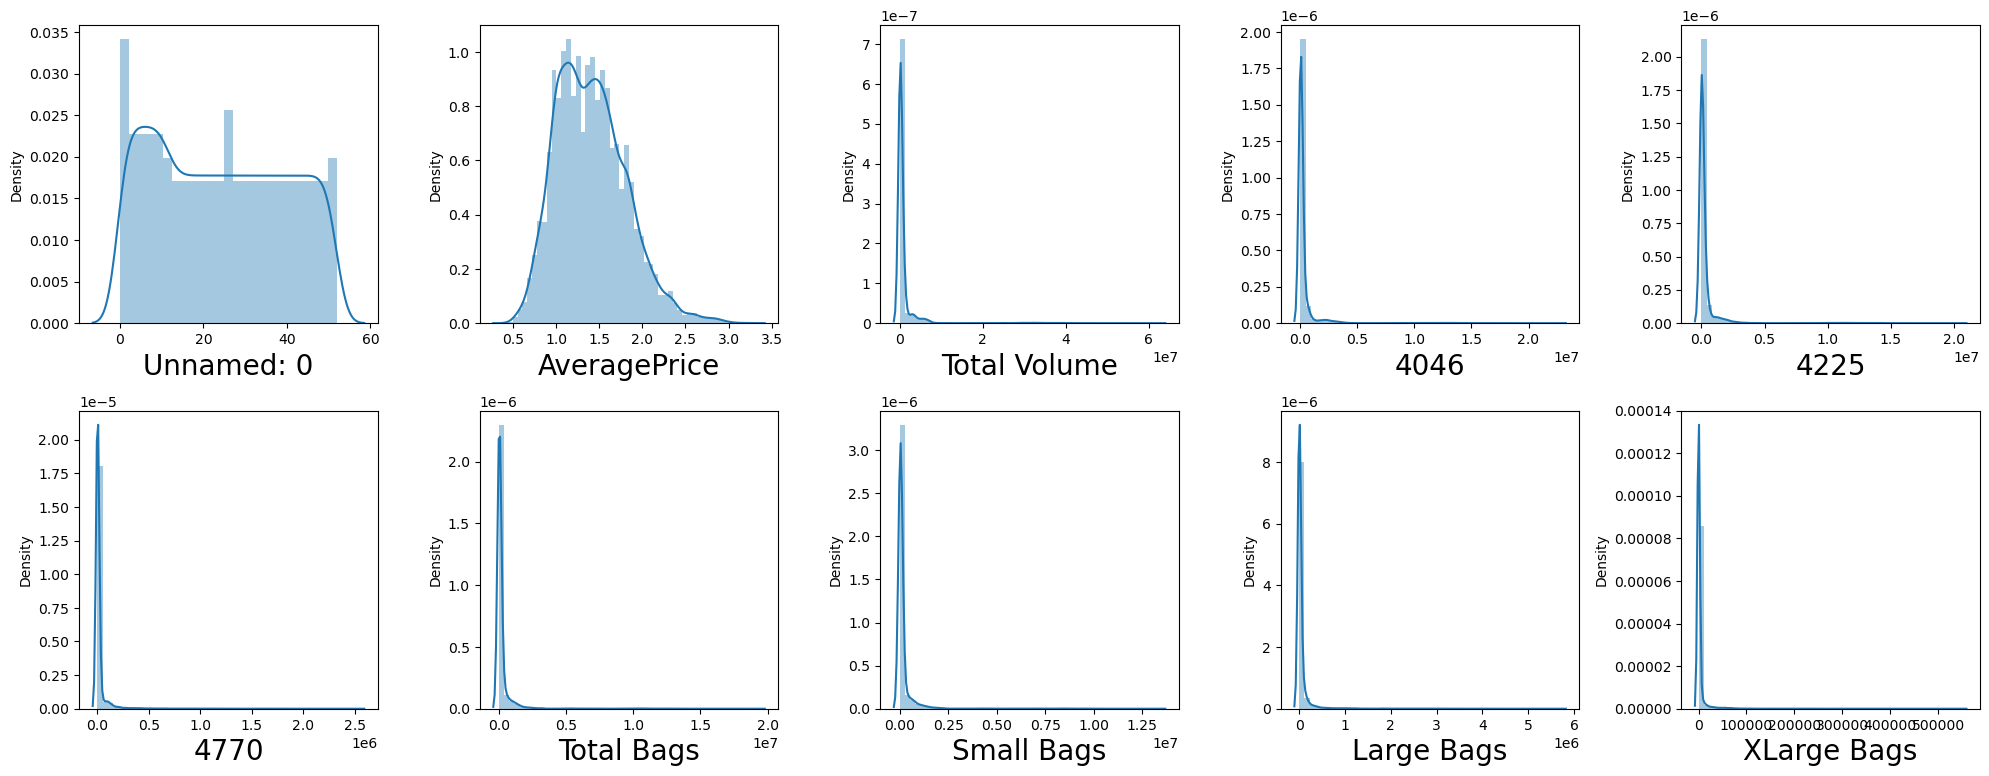

In [28]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number=1
for column in df[["Unnamed: 0","AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]:
    if plot_number<=20:
        
        ax=plt.subplot(4,5,plot_number)
        
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
     
        
    plot_number+=1
    
plt.tight_layout()

here data are skewed thats why we choose IQR method to remove outliers

In [31]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [32]:
out_features=df[["Unnamed: 0","Total Volume","4046","4225","Total Bags","Small Bags","Large Bags"]]

In [35]:
Q1=out_features.quantile(0.25)
Q3=out_features.quantile(0.75)
IQR=Q2-Q1
df1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [36]:
df1.shape

(13755, 13)

In [37]:
df.shape

(18249, 13)

In [38]:
print("Data Loss Percentage after removing outliers by using of method IQR =",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers by using of method IQR = 24.62600690448792


here loss percentage is high thatwhy we can go through the zscore method for removing outliers

In [39]:
z=np.abs(zscore(out_features))

In [40]:
np.where (z>3)

(array([ 346,  359, 1516, ..., 9111, 9112, 9113], dtype=int64),
 array([2, 2, 3, ..., 6, 6, 6], dtype=int64))

In [41]:
df2=df[(z<3).all(axis=1)]

In [175]:
print("old data frame :",df.shape)
print("new data frame :",df2.shape)

old data frame : (18249, 13)
new data frame : (17954, 13)


In [176]:
print("Data Loss Percentage after removing outliers by using of method zscore =",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers by using of method zscore = 1.616526932982629


In [42]:
df=df2

In [43]:
df.shape

(17954, 13)

In [44]:
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


In [45]:
df.skew()

Unnamed: 0      0.110445
AveragePrice    0.568411
Total Volume    3.574731
4046            4.635038
4225            4.129553
4770            6.551567
Total Bags      3.871923
Small Bags      4.105150
Large Bags      4.812358
XLarge Bags     7.095324
year            0.219855
dtype: float64

In [46]:
df[["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]=np.log1p(df[["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]])

In [47]:
df.skew()

Unnamed: 0      0.110445
AveragePrice    0.568411
Total Volume   -0.026746
4046           -0.400570
4225           -0.581184
4770            0.083835
Total Bags     -0.372056
Small Bags     -0.757482
Large Bags     -0.605922
XLarge Bags     1.210715
year            0.219855
dtype: float64

In [48]:
df["XLarge Bags"]=np.cbrt(df["XLarge Bags"])

In [49]:
df["XLarge Bags"].skew()

0.8247740825909539

In [50]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,2015,Albany
2015-12-20,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,2015,Albany
2015-12-13,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,2015,Albany
2015-12-06,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,2015,Albany
2015-11-29,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,2015,Albany


In [56]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,conventional,2015,Albany
2015-12-20,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,conventional,2015,Albany
2015-12-13,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,conventional,2015,Albany
2015-12-06,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,conventional,2015,Albany
2015-11-29,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,conventional,2015,Albany


In [59]:
y=df["region"].copy()

In [61]:
y.shape

(17954,)

In [62]:
df.drop(["type","year","region"],axis=1,inplace=True)


In [63]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [64]:
calc_vif(df)

,variables,VIF FACTOR
0,Unnamed: 0,3.470129
1,AveragePrice,12.490212
2,Total Volume,635.613924
3,4046,40.543642
4,4225,91.434534
5,4770,8.427615
6,Total Bags,477.851480
7,Small Bags,144.279841
8,Large Bags,11.864190
9,XLarge Bags,2.668077


In [65]:
df.drop(["Total Volume","Total Bags"],axis=1,inplace=True)

In [66]:
calc_vif(df)

,variables,VIF FACTOR
0,Unnamed: 0,3.249720
1,AveragePrice,9.668701
2,4046,25.317539
3,4225,43.284377
4,4770,8.050622
5,Small Bags,34.135909
6,Large Bags,7.510227
7,XLarge Bags,2.667699


In [67]:
Y=df["AveragePrice"]

In [68]:
X=df.drop("AveragePrice",axis=1)

In [69]:
X.shape

(17954, 7)

In [70]:
Y.shape

(17954,)

In [71]:
scaler=StandardScaler()

In [72]:
scaler.fit(X)


StandardScaler()

In [73]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Maximum r2 score is ",maxAccu,"on Random state",maxRS)

Maximum r2 score is  0.4058954578172964 on Random state 199


In [101]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=maxRS)

In [102]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print("R2_score",r2_score(y_test,pred_LR)*100)
print("R2 score on traing data",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error",mean_absolute_error(y_test,pred_LR))
print("Mean Squared Error",mean_squared_error(y_test,pred_LR))
print("Root mean squared Error",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score 39.72275333562959
R2 score on traing data 36.448395339356324
Mean Absolute Error 0.24643906254723397
Mean Squared Error 0.09888942299875798
Root mean squared Error 0.3144668869670668


In [74]:
y.shape

(17954,)

In [81]:
y.head()

Date
2015-12-27    Albany
2015-12-20    Albany
2015-12-13    Albany
2015-12-06    Albany
2015-11-29    Albany
Name: region, dtype: object

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=199)

In [82]:
dtr=DecisionTreeRegressor()
       

In [83]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [91]:
preddtr=lr.predict(x_test)

In [92]:
ac=r2_score(y_test,preddtr)

In [93]:
print(ac)

0.4058954578172964


In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [96]:
gbr=GradientBoostingRegressor()

In [119]:
gbr.fit(x_train,y_train)
predgbr=lr.predict(x_test)
act=r2_score(y_test,predgbr)
print(act)

0.39733090581060126


In [123]:
import pickle

In [124]:
filename="picklegbrfile.pkl"


In [125]:
pickle.dump(gbr,open(filename,"wb"))

In [126]:
loaded_model=pickle.load(open(filename,"rb"))

In [127]:
loaded_model.predict(x_test)

array([1.23386924, 1.62936161, 1.40590499, ..., 1.29949976, 1.18322982,
       1.27912691])